1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

***Ответ:*** а, е

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_electricity = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data_electricity.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [3]:
data_electricity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [4]:
data_electricity['DUQ_MW'].isnull().sum()

0

Мы имеем 119068 измерений с интервалом 1 час. Пропуски отсутствуют. Измерения начаты 2005-12-31 01:00:00 и закончены 2018-01-02 00:00:00. Данные представлены типом float64.

Text(0, 0.5, 'МВт')

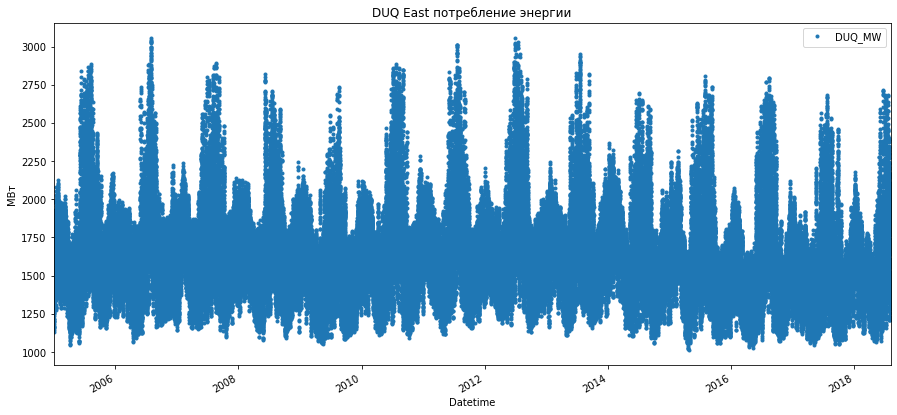

In [5]:
data_electricity.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ East потребление энергии' )
plt.ylabel ( 'МВт' )

По графику видно, что потребление происходит с равномерно чередующимися пиками и спадами. Существенные выбросы отсутствуют

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [6]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [7]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
Значение    2667 non-null float64
dtypes: float64(1)
memory usage: 41.7 KB


In [8]:
brent_data['Значение'].isnull().sum()

0

In [9]:
brent_data.index.nunique() == brent_data.shape[0]

True

In [10]:
brent_data = brent_data.rename(columns={'Значение': 'price'})
brent_data.index.names = ['date']

In [11]:
brent_data['data'] = brent_data.index
brent_data  = brent_data.sort_index()
brent_data['year'] = brent_data['data'].dt.year
brent_data['month'] = brent_data['data'].dt.month
brent_data['weekofyear'] = brent_data['data'].dt.weekofyear
brent_data['dayofmonth'] = brent_data['data'].dt.day
brent_data = brent_data.drop('data', axis = 1)
brent_data.head(10)

,price,year,month,weekofyear,dayofmonth
date,,,,,
2010-09-01,76.37,2010,9,35,1
2010-09-02,76.89,2010,9,35,2
2010-09-03,76.57,2010,9,35,3
2010-09-04,76.62,2010,9,35,4
2010-09-05,76.63,2010,9,35,5
2010-09-06,76.87,2010,9,36,6
2010-09-07,77.26,2010,9,36,7
2010-09-08,77.93,2010,9,36,8
2010-09-09,77.21,2010,9,36,9


4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [12]:
brent_year = brent_data.resample('Y').mean()['price']
brent_year_std = brent_data.resample('Y').std()['price']

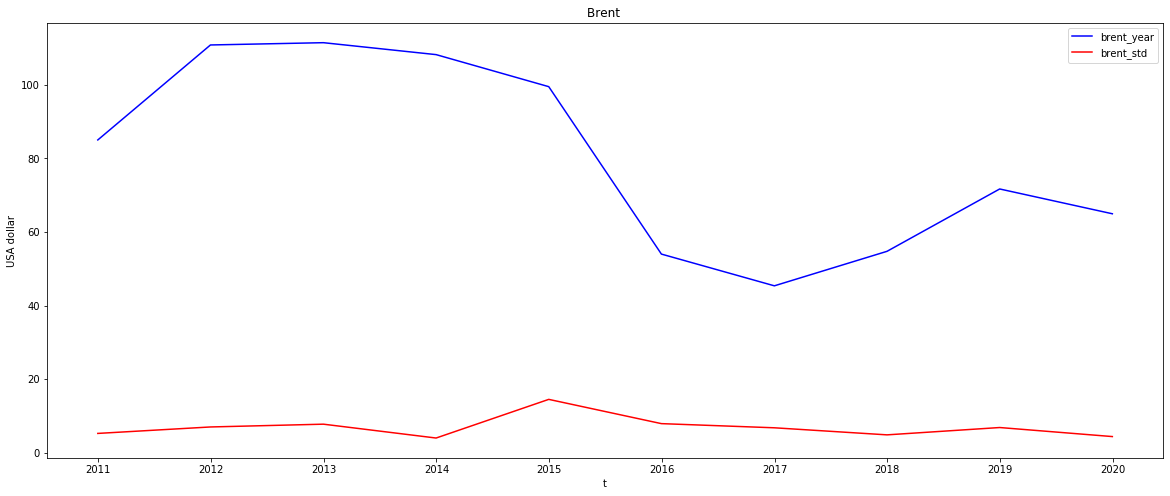

In [13]:
plt.figure( figsize=( 20, 8))
plt.plot(brent_year.index, brent_year, 'b', label = 'brent_year')
plt.plot(brent_year_std.index, brent_year_std, 'r', label = 'brent_std' )
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.title('Brent ')
plt.legend()
plt.show()

In [14]:
brent_month = brent_data.resample('M').mean()['price']
brent_month_std = brent_data.resample('M').std()['price']

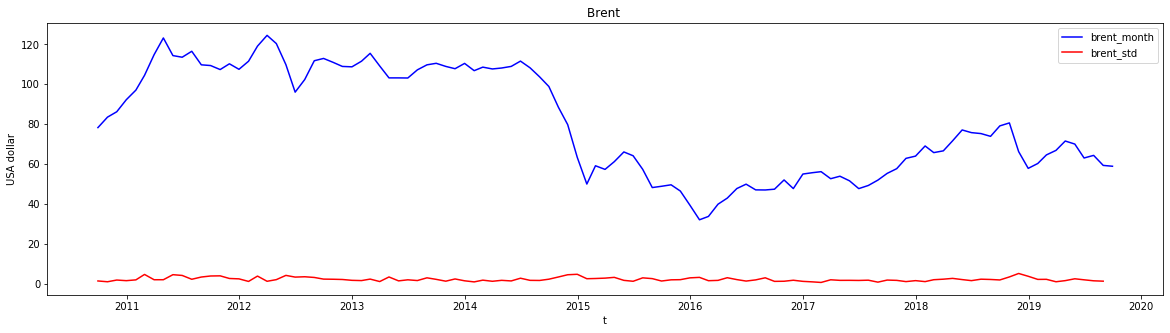

In [15]:
plt.figure( figsize=( 20, 5))
plt.plot(brent_month.index, brent_month, 'b', label = 'brent_month')
plt.plot(brent_month_std.index, brent_month_std, 'r', label = 'brent_std' )
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.title('Brent ')
plt.legend()
plt.show()

In [16]:
brent_weekofyear = brent_data.resample('W').mean()['price']
brent_weekofyear_std = brent_data.resample('M').std()['price']

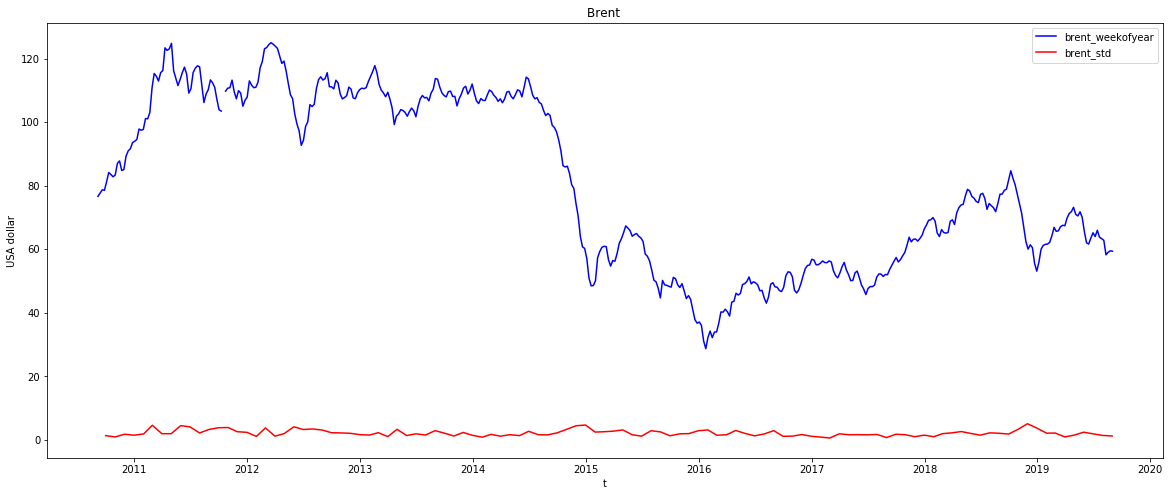

In [17]:
plt.figure( figsize=( 20, 8))
plt.plot(brent_weekofyear.index, brent_weekofyear, 'b', label = 'brent_weekofyear')
plt.plot(brent_weekofyear_std.index, brent_weekofyear_std, 'r', label = 'brent_std' )
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.title('Brent ')
plt.legend()
plt.show()

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

Среднее значение и среднее отклонение на недельных графиках имеют сглаженный вид, по сравнению с годовым графиком. В последнюю неделю года среднее значение и среднеее отклонение падают. Скорее всего, это связано с рождественскими каникулами и отсутствием торгов по нефти.

In [18]:
brent_data.to_csv('my_brent.csv', encoding='utf-8')

In [21]:
df = pd.read_csv('my_brent.csv', index_col='date')
df.head()

,price,year,month,weekofyear,dayofmonth
date,,,,,
2010-09-01,76.37,2010,9,35,1
2010-09-02,76.89,2010,9,35,2
2010-09-03,76.57,2010,9,35,3
2010-09-04,76.62,2010,9,35,4
2010-09-05,76.63,2010,9,35,5
